# Notebook 1: Afferents

### General Overview

The afferents, also known as hair fields, transform a time course of joint angles into $N_\text{h}$ hair angles. These hair angles are then converted into currents, which feed into sensory neurons. The sensory neurons further convert these currents into spike trains. Their spiking dynamics are optimized to closely resemble experimental spiking dynamics [1].


>[1] Okada, J., & Toh, Y. (2001). Peripheral representation of antennal orientation by the scapal hair plate of the cockroach Periplaneta americana. Journal of experimental biology, 204(24), 4301-4309.

### Cell-by-Cell Description

#### Importing Modules and Creating Folders

This cell serves to import general functions, modules, and dictionaries from the 'general' module. Additionally, it imports the hair field class, which is integral to subsequent analyses. The hair field class converts joint angles into hair angles, see hair_field.py for more information.

In [1]:
# Import necessary functions, modules and dictionaries from the 'general' module
from general import *

# Import class the hairfield and adex classes
from classes import HairField
from classes import AdEx

# Create a folder named 'images' and subfolder 'images/afferents' if it does not already exist 
# This is where figures will be saved
create_folder_if_not_exists('images')
create_folder_if_not_exists('images/afferents')

Folder 'images' already exists.
Folder 'images/afferents' already exists.


#### Analyzing the Non-Binary Hair Plate Model

To explore the behavior of the hair plate model, let's set up a hypothetical scenario:

- The hair plate consists of 10 hairs.
- The domain of the hair plate spans from 0$\degree$ to 180$\degree$.
- The maximum deflection of each hair is 90$\degree$.
- There's an overlap of 4$\degree$ between adjacent hairs.

To cover the full domain of the hair plate, we generate joint angles ranging from -20$\degree$ to 200$\degree$. After creating an instance of the HairField class with these parameters, we convert these joint angles into $N_\text{h}$ hair angles.

In [2]:
# Define parameters for the hair field
parameters_hair_field = {
    'N_hairs': 10,                # Number of hairs
    'max_joint_angle': 180,       # Maximum joint angle
    'min_joint_angle': 0,         # Minimum joint angle
    'max_angle': 90,              # Maximum angle
    'overlap': 4                  # Overlap factor
}

# Generate joint angles from -20, to 200 with 2000 steps
joint_angle = np.linspace(-20, 200, num=2000)

# Create an instance of the HairField class with the specified parameters, and calculate the receptive field
hair_field = HairField(parameters_hair_field)
hair_field.get_receptive_field()

# Obtain hair angles corresponding to the given joint angles
hair_angles = hair_field.get_hair_angle(joint_angle)

plotted as follows:
 
- The joint angles are plotted against the corresponding hair angles.
- Shading indicates the overlaps between receptive fields.
- The generated figures are saved in the directory 'images/afferents/'.

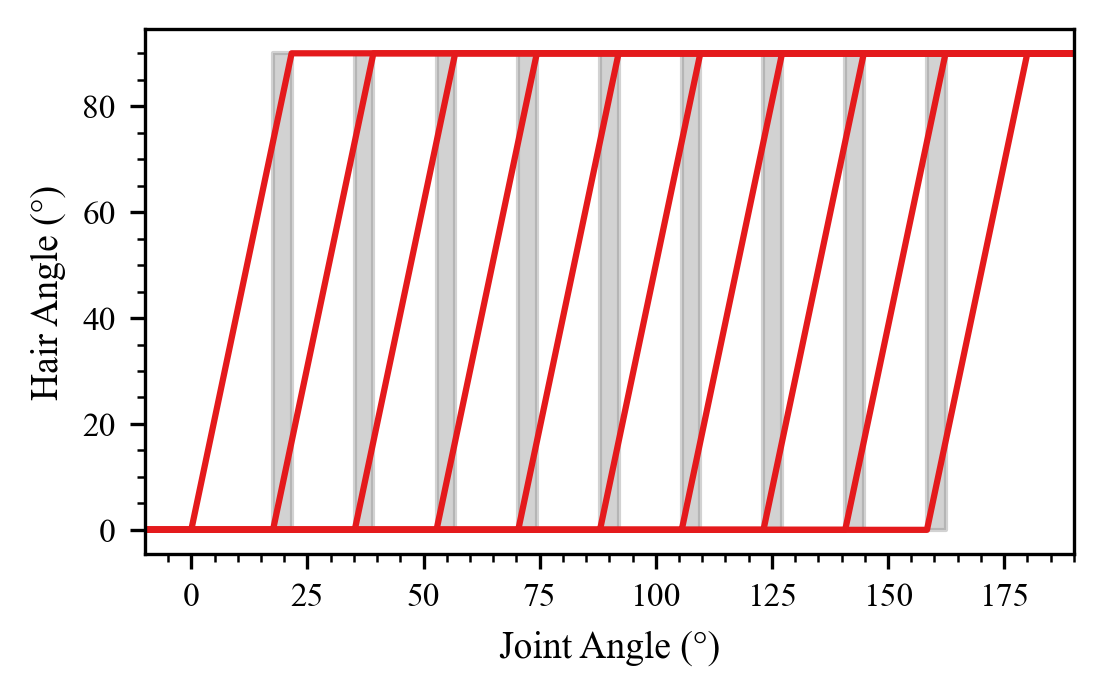

In [3]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the relationship between joint angle and hair angle
plt.plot(joint_angle, hair_angles, color=custom_colors[0], linestyle=custom_linestyles[0])

# Fill the overlap between receptive fields
for i in range(hair_field.N_hairs - 1):
    plt.fill_between([hair_field.receptive_field[0, 1+i], hair_field.receptive_field[1, i]], [90, 90], 
                     color='grey', 
                     alpha=0.35)

# Set plot labels etc. 
ax.set_xlabel("Joint Angle (°)")
ax.set_ylabel("Hair Angle (°)")
ax.set_xlim(-10, 190)
ax.minorticks_on()

# Save the figures
fig.tight_layout(pad=parameters['pad'])
fig.savefig('images/afferents/uni_hairplate.png')

#### Analyzing the Binary Hair Plate Model

To explore the behavior of the hair plate model, let's set up a hypothetical scenario:

- A hair field consists of 10 hairs.
- The domain of the hair plate spans from 0$\degree$ to 180$\degree$.
- The maximum deflection of each hair is 90$\degree$.
- There's an overlap of 4$\degree$ between adjacent hairs.

To cover the full domain of the hair plate, we generate joint angles ranging from -20$\degree$ to 200$\degree$. After creating an instance of the HairField class with these parameters, we convert these joint angles into $N_\text{h}$ hair angles.

In [4]:
# Define parameters for the hair field
parameters_hair_field = {
    'N_hairs': 10,                # Number of hairs
    'max_joint_angle': 180,       # Maximum joint angle
    'min_joint_angle': 0,         # Minimum joint angle
    'max_angle': 90,              # Maximum angle
    'overlap': 4                  # Overlap factor
}

# Generate joint angles from -20, to 200 with 2000 steps
joint_angle = np.linspace(-20, 200, num=2000)

# Create an instance of the HairField class with the specified parameters, calculate the receptive field, and make it binary (two directional).
hair_field = HairField(parameters_hair_field)
hair_field.get_receptive_field()
hair_field.get_double_receptive_field()

# Obtain hair angles corresponding to the given joint angles
hair_angles = hair_field.get_hair_angle(joint_angle)

##### Binary Hair Plate Connected to Position DIN

plotted as follows:
 
- The joint angles are plotted against the corresponding hair angles, for both hair fields. Note that half of the hairs are plotted (position DIN)
- Shading indicates the overlaps between receptive fields.
- The generated figures are saved in the directory 'images/afferents/'.

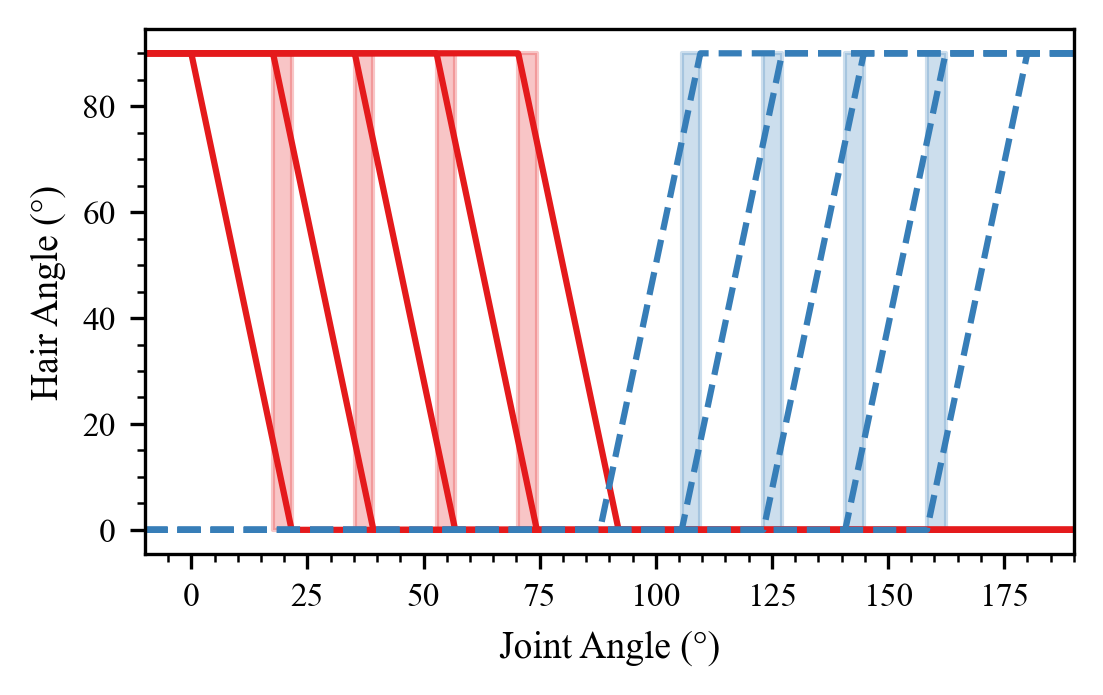

In [5]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Determine indices for dividing the hair angles into positive and negative fields
n_2 = int(hair_field.N_hairs / 2)
n_4 = int(n_2 / 2)

# Plot hair angles for the positive hair field
plt.plot(joint_angle, hair_angles[:, n_4], color=custom_colors[0], linestyle=custom_linestyles[0])
plt.plot(joint_angle, hair_angles[:, 1 + n_4:n_2], color=custom_colors[0], linestyle=custom_linestyles[0])

# Plot hair angles for the negative hair field
plt.plot(joint_angle, hair_angles[:, n_2 + n_4], color=custom_colors[1], linestyle=custom_linestyles[1])
plt.plot(joint_angle, hair_angles[:, 1 + n_2 + n_4:], color=custom_colors[1], linestyle=custom_linestyles[1])

# Fill the area between receptive fields for the positive hair field
for i in range(n_4 - 1):
    plt.fill_between([hair_field.receptive_field[0, n_4 + i + 1], hair_field.receptive_field[1, n_4 + i]], [90, 90], 
                     color=custom_colors[0],
                     alpha=0.25)

# Fill the area between receptive fields for the negative hair field
for i in range(n_4 - 1):
    plt.fill_between([hair_field.receptive_field[0, n_2 + n_4 + i + 1], hair_field.receptive_field[1, n_2 + n_4 + i]], [90, 90],
                     color=custom_colors[1],
                     alpha=0.25)

# Set plot labels etc. 
ax.set_xlabel("Joint Angle (°)")
ax.set_ylabel("Hair Angle (°)")
ax.set_xlim(-10, 190)
ax.minorticks_on()

fig.tight_layout(pad=parameters['pad'])
fig.savefig('images/afferents/bi_hairplate_pos.png')

##### Binary Hair Plate Connected to Velocity DIN

Same as before with the following changes:
- All hairs are connected to the velocity DIN, and therefore plotted.
- The overlap region is omitted for clarity.

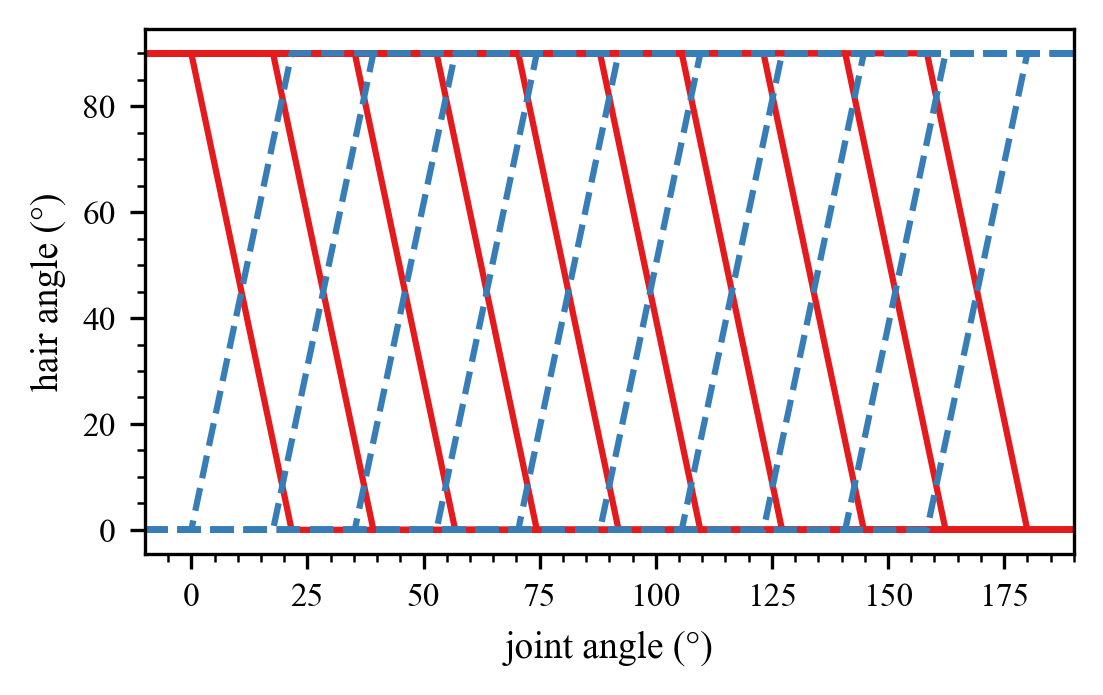

In [6]:
# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot hair angles for the positive hair field
plt.plot(joint_angle, hair_angles[:, :n_2], 
         color=custom_colors[0], 
         linestyle=custom_linestyles[0])

# Plot hair angles for the negative hair field
plt.plot(joint_angle, hair_angles[:, n_2:], 
         color=custom_colors[1], 
         linestyle=custom_linestyles[1])

# Set plot labels etc.     
ax.set_xlabel("joint angle (°)")
ax.set_ylabel("hair angle (°)")
ax.set_xlim(-10, 190)
ax.minorticks_on()

# Save the figures
fig.tight_layout(pad=parameters['pad'])
fig.savefig('images/afferents/bi_hairplate_vel.png')

In [7]:
def ramp_generator(n_ramp, n_steps, height, base=0):
    n_dims = height.size
    
    input_ramp = np.zeros((n_steps, n_dims))

    for i in range(n_dims):
        increase = np.linspace(base, height[i], n_ramp[i])
        constant = np.linspace(height[i], height[i], n_steps - 2 * n_ramp[i])
        decrease = np.linspace(height[i], base, n_ramp[i])
        
        input_ramp[:, i] = np.concatenate((increase, constant, decrease))
        
    return input_ramp

In [8]:
sensory_parameters = {'C': 200e-12, 'g_L': 2e-9, 'E_L': -70e-3, 'DeltaT': 2e-3, 'a': 2e-9, 'V_T': -50e-3,
                      'tau_W': 50e-3, 'b': 264e-12, 'V_R': -70e-3, 'V_cut': -40e-3, 'n': 5, 'dt': 0.0001}

sensory_neuron = AdEx(sensory_parameters)
sensory_neuron.initialize_state()

In [9]:
v_var, v_stat = np.array([24, 47, 88, 151, 245])*4, 60*4
max_angle_var, max_angle_stat = np.array([15, 23, 34, 46, 60]), 37
t_total = 3
j=0

N_steps = round(t_total/sensory_parameters['dt'])
spike_train, input_ramp = np.empty((N_steps + 2, v_var.size, 2)), np.empty((N_steps, v_var.size, 2))
for [v, max_angle] in [[v_var, max_angle_stat], [v_stat, max_angle_var]]:

    N_ramp = np.around(max_angle/(v*sensory_parameters['dt'])).astype(int)
    height = np.empty(sensory_parameters['n'])
    height[:] = max_angle/18e9
    
    input_ramp[:, :, j] = ramp_generator(N_ramp, N_steps, height)

    sensory_neuron.initialize_state()
    
    time = np.array([])
    for i in range(N_steps):
        _, spike_train[i, :, j] = sensory_neuron.forward(input_ramp[i, :, j])
        time = np.append(time, i*sensory_parameters['dt'])
        
    j +=1

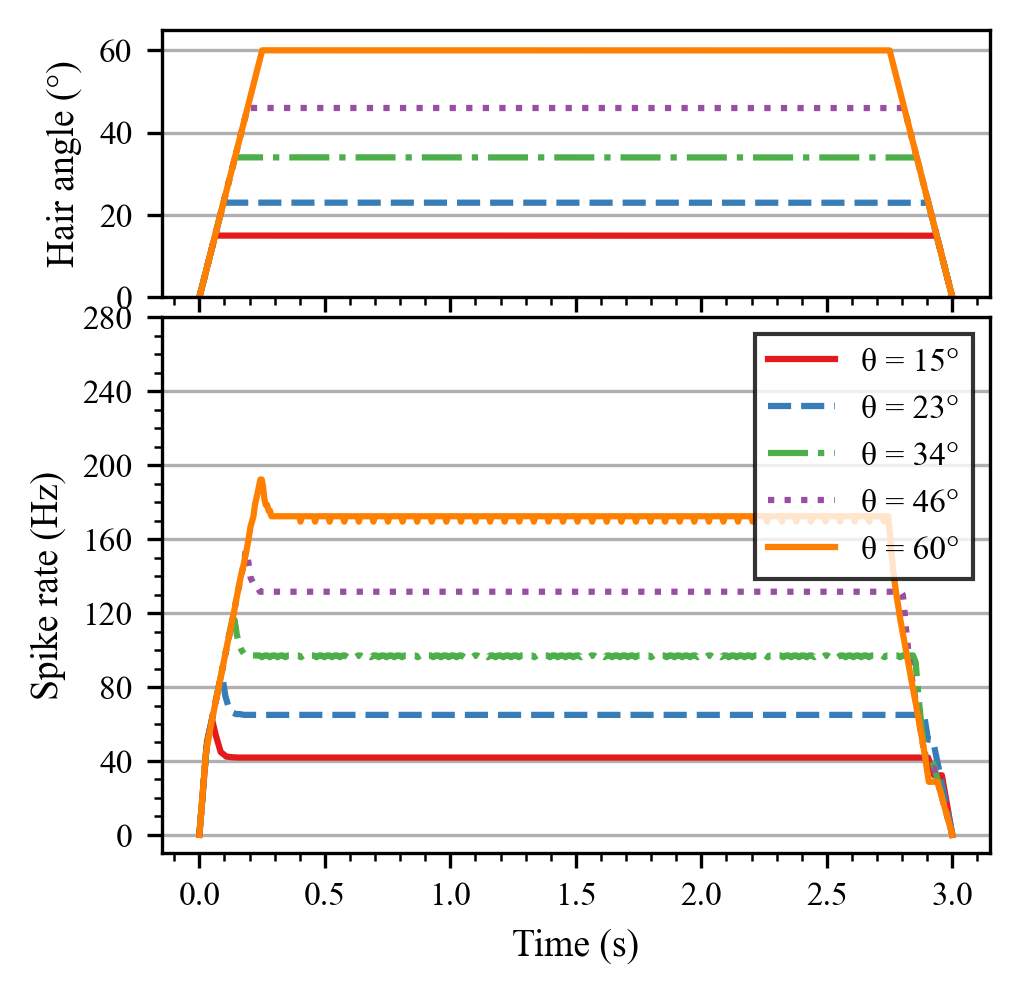

In [10]:
fig, [ax, ax2] = plt.subplots(2, figsize=(3.75*0.95, 3.75*0.95), gridspec_kw={'height_ratios': [1, 2]}, sharex='all')
plt.subplots_adjust(wspace=0, hspace=0.05)

for i in range(v_var.size):
    firing_rate, spike_index = get_firing_rate_ISI(spike_train[:, i, 1], sensory_parameters['dt'])
    ax.plot(time, input_ramp[:, i, 1]*18e9, color=custom_colors[i], linestyle=custom_linestyles[i])
    ax2.plot(time[spike_index], firing_rate, color=custom_colors[i], linestyle=custom_linestyles[i])

ax.set_ylabel("Hair angle (°)")
ax.grid(axis='y')

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Spike rate (Hz)")
ax.set_ylim([0, 65])
ax.set_yticks([0, 20, 40, 60])
ax2.grid(axis='y')
ax2.legend(['θ = 15°', 'θ = 23°', 'θ = 34°', 'θ = 46°', 'θ = 60°'], fancybox=False, edgecolor='black')  
ax2.set_yticks([0, 40, 80, 120, 160, 200, 240, 280])
ax2.minorticks_on()

In [11]:
fig.tight_layout(pad=parameters['pad'])
fig.savefig('images/afferents/single_hair_constant_angle.png')

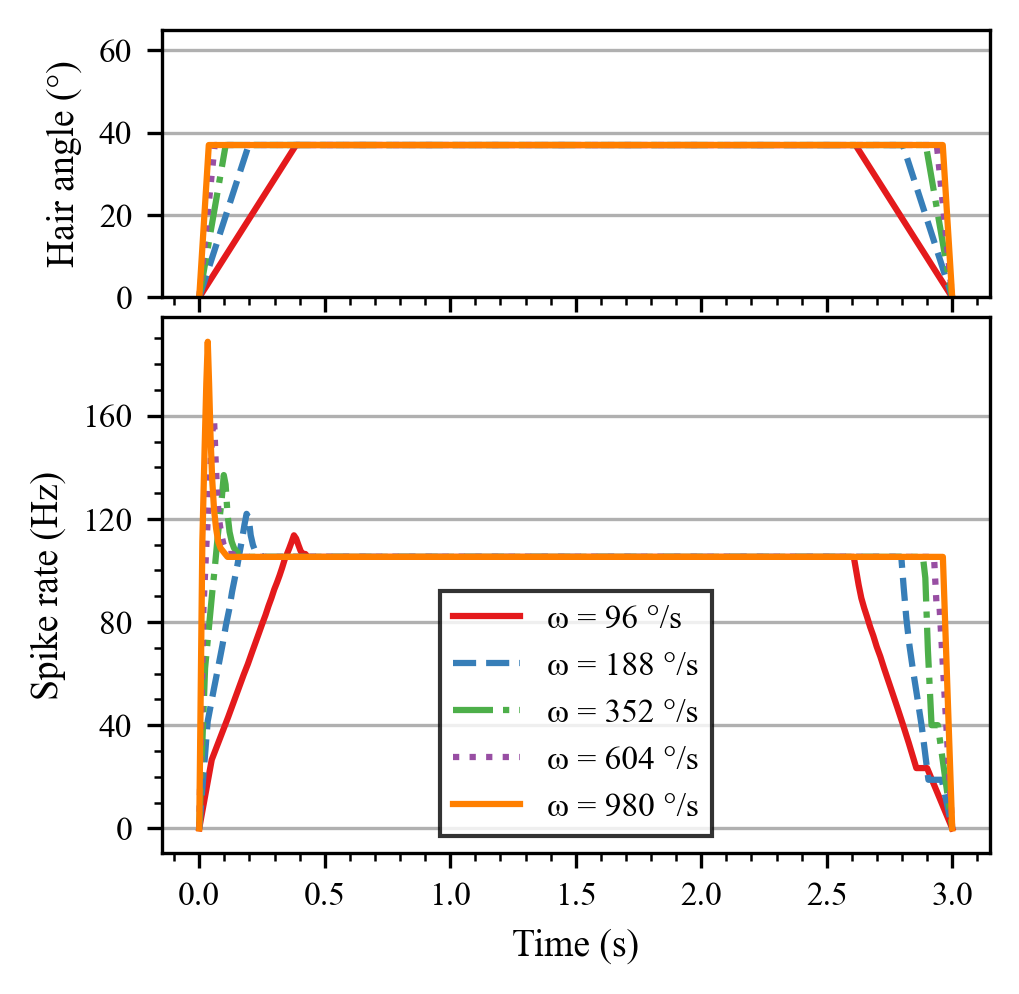

In [12]:
fig, [ax, ax2] = plt.subplots(2, figsize=(3.75*0.95, 3.75*0.95), gridspec_kw={'height_ratios': [1, 2]}, sharex='all')
plt.subplots_adjust(wspace=0, hspace=0.05)

for i in range(5):
    firing_rate, spike_index = get_firing_rate_ISI(spike_train[:, i, 0], sensory_parameters['dt'])
    ax.plot(time, input_ramp[:, i, 0]*18e9, color=custom_colors[i], linestyle=custom_linestyles[i])
    ax2.plot(time[spike_index], firing_rate, color=custom_colors[i], linestyle=custom_linestyles[i])

ax.set_ylabel("Hair angle (°)")
ax.grid(axis='y')
ax.set_yticks([0, 10, 20, 30, 40])

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Spike rate (Hz)")
ax2.grid(axis='y')
ax.set_ylim([0, 65])
ax.set_yticks([0, 20, 40, 60])
ax2.legend(['ω = 96 °/s', 'ω = 188 °/s', 'ω = 352 °/s', 'ω = 604 °/s', 'ω = 980 °/s'], fancybox=False, edgecolor='black', loc='lower center')
ax2.set_yticks([0, 40, 80, 120, 160])
ax2.minorticks_on()

In [13]:
fig.tight_layout(pad=parameters['pad'])
fig.savefig('images/afferents/single_hair_variable_angle.png')

In [14]:
with open('temp_data/joint_angles_' + parameters['joint_string'], 'rb') as file:
    joint_angles = np.load(file)
    
 
sensory_parameters['n'] = parameters['N_HAIRS']*36
sensory_parameters['dt'] = constants['dt']
sensory_neuron = AdEx(sensory_parameters)
spike_sensory = np.empty((constants['N_STEPS'], constants['N_ANGLES'] * parameters['N_HAIRS'] * 2, parameters['N_SIMULATIONS']), dtype=np.uint8)

time = np.linspace(0, constants['T_TOTAL'], num=constants['N_STEPS'])

In [15]:
for k in tqdm(range(parameters['N_SIMULATIONS'])):
    
    joint_angle = joint_angles[:, :, k]

    hair_angles = np.empty((joint_angle.shape[0], 2 * joint_angle.shape[1] * parameters['N_HAIRS']), dtype=np.float32)
    hair_field_parameters = {'N_hairs': parameters['N_HAIRS'], 'min_joint_angle': np.amin(joint_angle, axis=0), 
                             'max_joint_angle': np.amax(joint_angle, axis=0), 'max_angle': 90, 'overlap': 0.1}
    
    for i in range(constants['N_ANGLES']):
        hair_field = HairField(hair_field_parameters)
        hair_field.reset_max_min(i)
        hair_field.get_double_receptive_field()
        hair_angles[:, i * 2 * parameters['N_HAIRS']: 2 * parameters['N_HAIRS'] + i * 2 * parameters['N_HAIRS']] = (
                hair_field.get_hair_angle(joint_angle[:, i]) / 18e9)
    
    sensory_neuron.initialize_state()
        
    for i in range(constants['N_STEPS']):
        _, spike_sensory[i, :, k] = sensory_neuron.forward(hair_angles[i, :])

  0%|          | 0/2 [00:00<?, ?it/s]

In [16]:
with open('temp_data/spike_sensory', 'wb') as file:
        np.save(file, spike_sensory)

C:\Users\thoma\AppData\Local\Temp/ipykernel_26368/1356845726.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


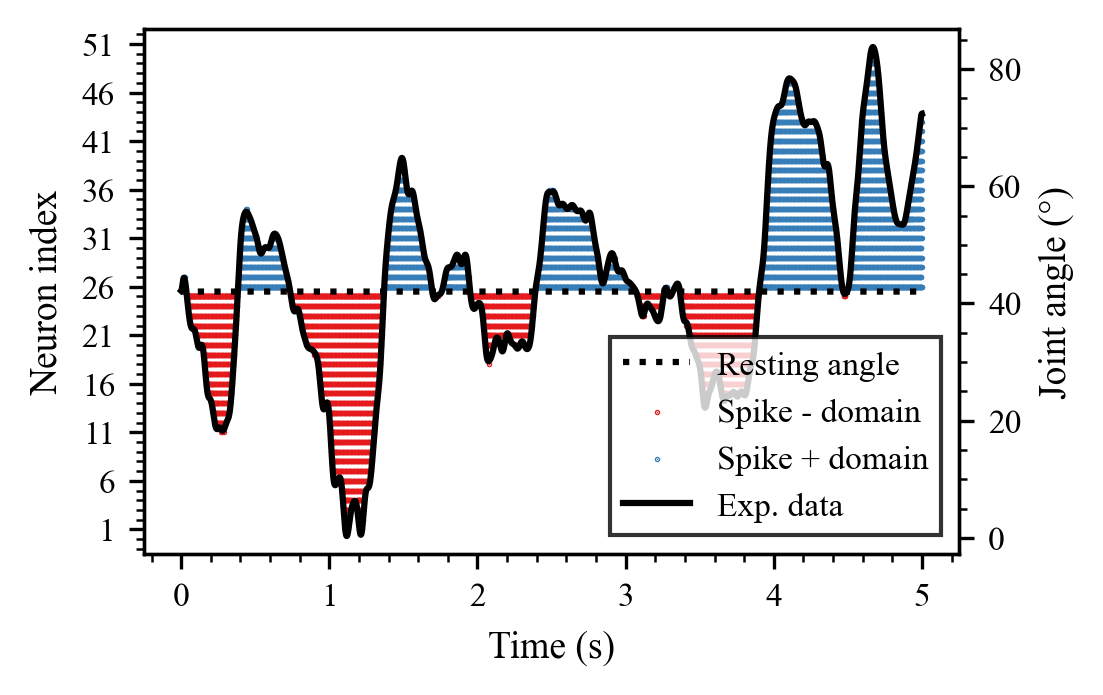

In [17]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

N_half = parameters['N_HAIRS'] // 2
diff = hair_field.max_list[0] - hair_field.min_list[0]

spike_sensory = spike_sensory[:, :, 0].astype(np.float32)
spike_sensory[spike_sensory == 0] = np.nan

i = 0 
ax1.scatter(time, (-i + N_half) * spike_sensory[:, i + N_half], color=custom_colors[0], s=0.1, label = 'Spike - domain')
ax1.scatter(time, (1 + i + N_half) * spike_sensory[:, i + N_half + parameters['N_HAIRS']], color=custom_colors[1], s=0.1, label = 'Spike + domain')

for i in range(N_half):
    ax1.scatter(time, (-i + N_half) * spike_sensory[:, i + N_half], color=custom_colors[0], s=0.1, label = '')
    ax1.scatter(time, (1 + i + N_half) * spike_sensory[:, i + N_half + parameters['N_HAIRS']], color=custom_colors[1], s=0.1)

ax2.plot(time, joint_angles[:, 0, 0], color='black', label = 'Exp. data')
ax1.plot(time, np.full(time.shape, N_half + 0.5), linestyle='dotted', color='black', label = 'Resting angle')
ax1.set_ylim(1 - parameters['N_HAIRS'] * .05, parameters['N_HAIRS'] * 1.05)
ax2.set_ylim(joint_angles[:, 0, 0].min() - .05 * diff, joint_angles[:, 0, 0].max() + .05 * diff)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Neuron index")
ax1.set_yticks(np.arange(1, parameters['N_HAIRS'] + 2)[::5])
ax2.set_ylabel("Joint angle (°)")

ax2.minorticks_on()
ax1.minorticks_on()
#ax1.set_ylim([1, n_index+1])
fig.legend(fancybox=False, edgecolor='black', bbox_to_anchor=[0.88, 0.54])

fig.tight_layout(pad=parameters['pad'])
fig.savefig('images/afferents/spike_timing_.png')
fig.show()

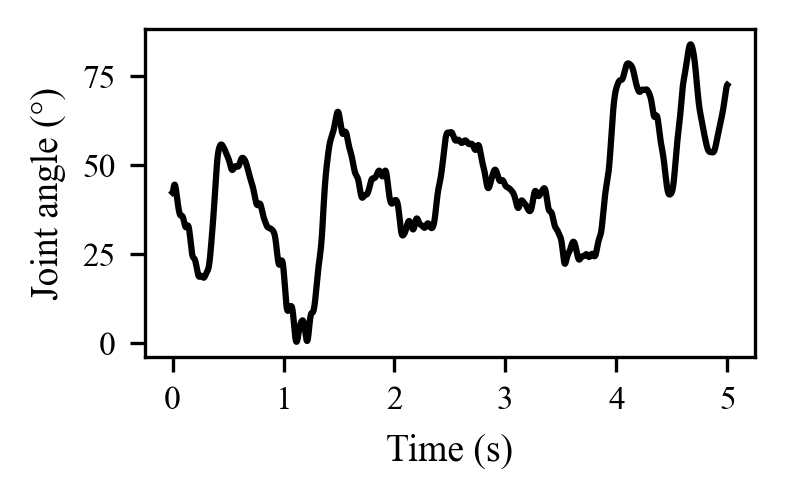

In [18]:
fig, ax = plt.subplots(figsize=(2.5, 2.5/1.61803398875))

ax.plot(time, joint_angles[:, 0, 0], color='black')

ax.set_xlabel("Time (s)")
ax.set_ylabel("Joint angle (°)")

fig.tight_layout(pad=parameters['pad'])
fig.savefig('images/afferents/joint_angle_time_course.png')

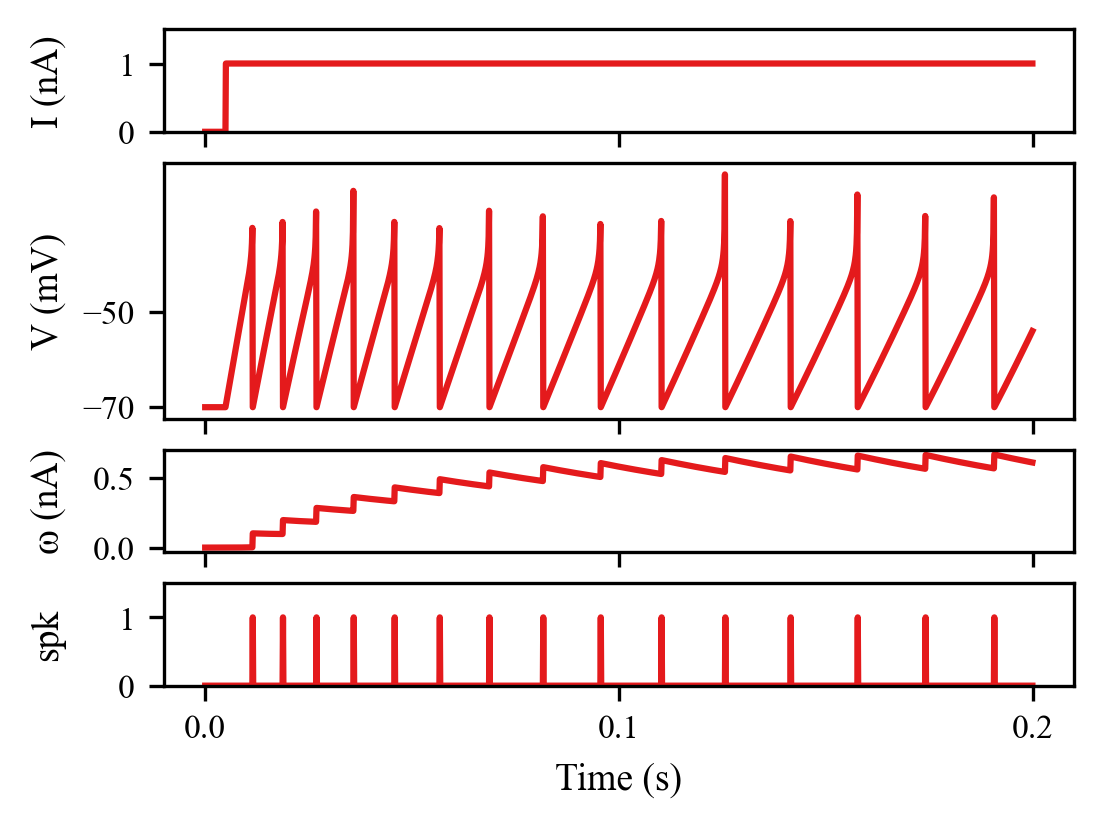

In [19]:
fig, [ax, ax2, ax3, ax4] = plt.subplots(4, figsize=(3.75*0.95, 1.2*0.95*3.75/1.61803398875), gridspec_kw={'height_ratios': [1, 2.5, 1, 1]}, sharex='all')
axs = [ax, ax2, ax3, ax4]
plt.subplots_adjust(wspace=0, hspace=0.05)

sensory_parameters = {'C': 200e-12, 'g_L': 2e-9, 'E_L': -70e-3, 'DeltaT': 2e-3, 'a': 2e-9, 'V_T': -50e-3,
                      'tau_W': 50e-3, 'b': 221e-12, 'V_R': -70e-3, 'V_cut': -20e-3, 'n': 1, 'dt': 0.0001}

sensory_neuron = AdEx(sensory_parameters)
sensory_neuron.initialize_state()

input = np.zeros(2000)
input[50:] = 1e-9

voltage, spikes, time, omega = np.zeros(input.size), np.zeros(input.size), np.zeros(input.size), np.zeros(input.size)

for i in range(input.size):
    voltage[i], spikes[i] = sensory_neuron.forward(input[i])
    omega[i] = sensory_neuron.state.w
    time[i] = i*0.0001 
    
ax.plot(time, input*1e9, color=custom_colors[0])    

ax.set_ylabel("I (nA)")
ax.set_yticks([0, 1])
ax.set_xticks([0, 0.1, 0.2])
ax.set_ylim(0, 1.5)

ax2.plot(time, voltage*1000, color=custom_colors[0])

ax2.set_ylabel("V (mV)")
ax2.set_yticks([-70, -50])

ax3.plot(time, omega*1e9, color=custom_colors[0])

ax3.set_ylabel("ω (nA)")
#ax3.set_ylim(0, 1.5)

ax4.plot(time, spikes, color=custom_colors[0])

ax4.set_ylabel("spk")
ax4.set_yticks([0, 1])
ax4.set_xlabel("Time (s)")
ax4.set_ylim(0, 1.5)

fig.align_ylabels([ax, ax2, ax3, ax4])               
fig.tight_layout(pad=parameters['pad'])
fig.savefig('images/afferents/AdEx_dynamics.png')